# THE PROBLEM & GOAL

**Problem:**

Once upon a time, in a far-off land, there lived a beautiful princess who had fallen gravely ill. The king and queen of the land tried everything in their power to cure her, but none of the remedies they tried seemed to work.

A group of local villagers approached the king and queen and told them about a set of magical ingredients that were said to have the power to cure any ailment. However, the villagers warned that these ingredients could be volatile in their effects, in addition, due to the recent droughts, only so many of the ingredients may be available at any given time, and only a skilled alchemist would be able to determine if a specific combination of these particularly volatile and scarce ingredients would to cure the princess.

The king and queen were desperate to save their daughter, so they set out to find the best alchemist in the land. They searched high and low and finally found an alchemist who had a reputation for being a master of a new magical art known as "Data Science and Machine Learning"

The alchemist first examined the claims of the villagers and the amounts they had taken of each ingredient, along with whether or not it had led to a cure. The alchemist knew that this was their one shot at curing the princess, and they had to get it right.

**Goal:**
- We will be trying to determine how accurate we will be with consistency with given sets of ingredients, as mentioned they are volatile and scarce so we need to be ready for different combinations to be available at any given time.
- These ingredients (features we will use to predict) are as follows:
  - Phoenix Feather
  - Unicorn Horn
  - Dragon's Blood
  - Mermaid Tears
  - Fairy Dust
  - Goblin Toes
  - Witch's Brew
  - Griffin Claw
  - Troll Hair
  - Kraken Ink
  - Minotaur Horn
  - Basellisk Scale
  - Chimera Fang
  
  
- Which will let us determine the target variable which is:
  - Cured (whether the ingredients and quantity combination lead to a cure)

# OUTLINE FOR NOTEBOOK

**Problem Type:**

Classification (Binary)



#PHASE-1


In [135]:
#importing libraries

import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Warnigs ignore
import warnings
warnings.filterwarnings("ignore")

# A) LOAD DATA

In [136]:
# Load the dataset into a pandas DataFrame with column names 
df = pd.read_csv("data.csv", header=0)

# CLEAN: GET INFO

In [137]:
# Print the ammount of rows and columns in the dataframe
print("[SHAPE BREAKDOWN]\n{} rows and {} columns".format(df.shape[0], df.shape[1]))

[SHAPE BREAKDOWN]
2338 rows and 14 columns


In [138]:
# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
df.head(10)


[FIRST 10 ROWS PREVIEW]


,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
5,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1
6,30.0,8.6,29.1,26.0,18.6,13.8,3.8,19.1,42.3,17.3,16.8,16.3,4.5,1
7,16.4,12.1,14.2,22.0,15.6,10.4,11.7,18.4,21.0,20.3,4.0,15.7,15.3,0
8,28.4,18.9,30.3,5.6,18.0,9.9,6.2,24.4,14.4,2.7,15.1,41.6,7.0,0
9,11.8,17.7,8.8,22.9,6.1,5.8,15.7,2.6,16.5,23.7,25.2,1.7,1.1,1


In [139]:
# Show the names of each column in the dataframe
print("\n[COLUMN BREAKDOWN]")
print(df.columns)


[COLUMN BREAKDOWN]
Index(['Phoenix Feather', 'Unicorn Horn', 'Dragon's Blood', 'Mermaid Tears',
       'Fairy Dust', 'Goblin Toes', 'Witch's Brew', 'Griffin Claw',
       'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale',
       'Chimera Fang', 'Cured'],
      dtype='object')


In [140]:
# Show the number of unique values in each column
print("[UNIQUE VALUES PER COLUMN]\n")
df.nunique()

[UNIQUE VALUES PER COLUMN]



Phoenix Feather    362
Unicorn Horn       303
Dragon's Blood     351
Mermaid Tears      321
Fairy Dust         351
Goblin Toes        330
Witch's Brew       329
Griffin Claw       341
Troll Hair         379
Kraken Ink         345
Minotaur Horn      295
Basilisk Scale     364
Chimera Fang       330
Cured                2
dtype: int64

## B)Distribution of each columns

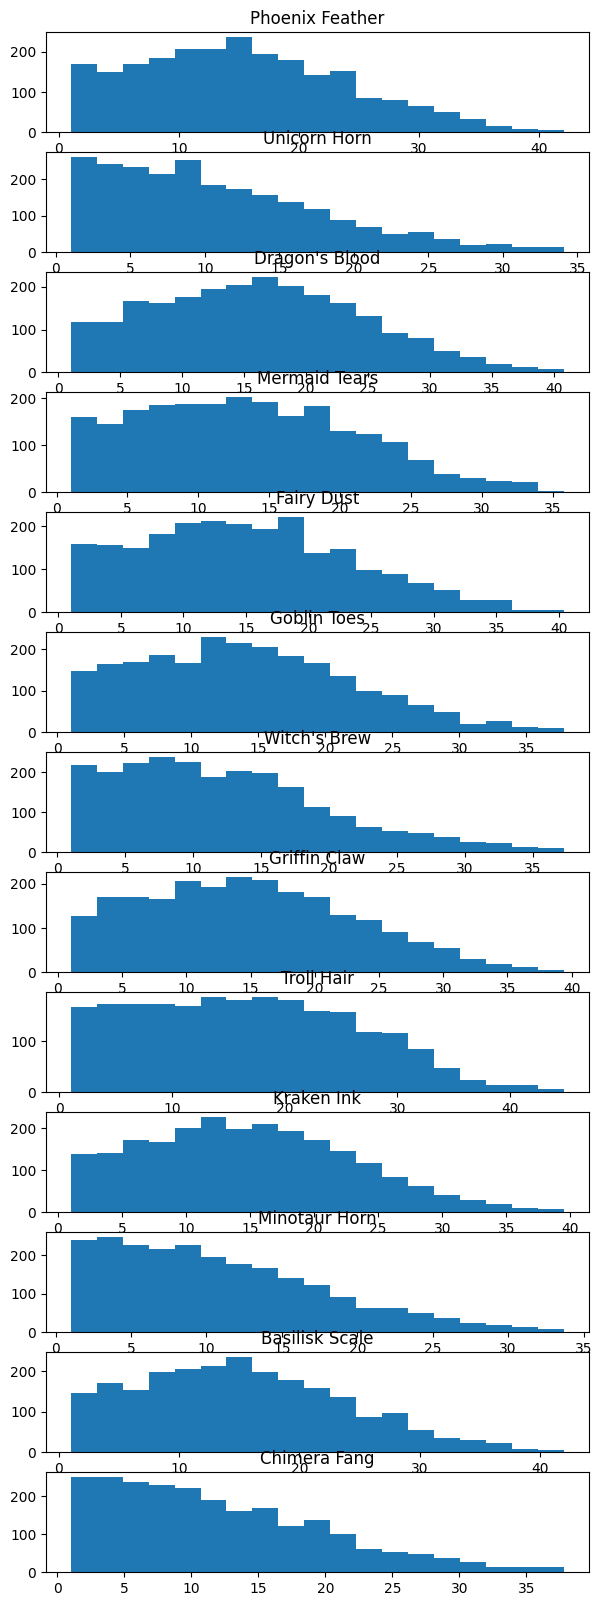

In [141]:
import matplotlib.pyplot as plt

# Plot the distribution of each column
fig, axs = plt.subplots(len(df.columns[:-1]), figsize=(7, 20))
for i, col in enumerate(df.columns[:-1]):
    axs[i].hist(df[col], bins=19)
    axs[i].set_title(col)
    
plt.show()


# Normalize the data

In [142]:
for col in df.columns[:-1]:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

PHASE 2:
OVERFITTING OF DATA

In [144]:
# Split the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [145]:
# Define the model architecture

model = Sequential()
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [146]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/150
234/234 [==============================] - 1s 2ms/step - loss: 0.6502 - accuracy: 0.6176
Epoch 2/150
234/234 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7716
Epoch 3/150
234/234 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8623
Epoch 4/150
234/234 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.9012
Epoch 5/150
234/234 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9162
Epoch 6/150
234/234 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9269
Epoch 7/150
234/234 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9354
Epoch 8/150
234/234 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9380
Epoch 9/150
234/234 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9435
Epoch 10/150
234/234 [==============================] - 0s 2ms/step - loss: 0.1468 - accura

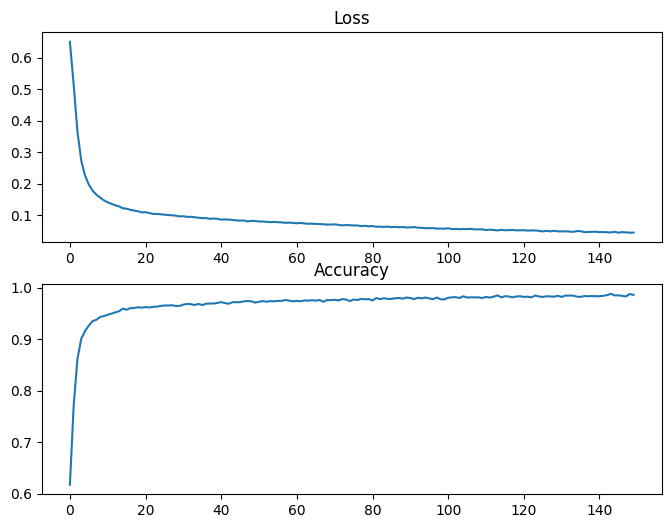

In [147]:
history = model.fit(X, y, epochs=150, batch_size=10, verbose=1)

# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

In [ ]:
df = shuffle(df)